## (7) Monitor and improve Virtual Agent performance through user satisfaction ratings and feedback
##### (GenAI Life Cycle Phase 7: Monitoring and Improvement self-practice)

#### **Case Scenario**
>
> CoffeePro’s virtual coffee concierge is now live and assisting users with personalized coffee recommendations. However, launching the virtual agent is just the beginning—ensuring its continuous improvement based on real user interactions is crucial. As users engage with the AI, their feedback, ratings, and behavioral data provide valuable insights into the assistant’s effectiveness, accuracy, and user satisfaction.
> 
> As the AI developer, your task is to implement a monitoring system that collects and analyzes feedback, allowing you to refine the virtual agent’s performance over time. This includes tracking response accuracy, identifying patterns in user satisfaction, and leveraging Retrieval-Augmented Generation (RAG) enhancements to improve recommendations. Additionally, the system should detect recurring issues, such as misinterpretations, biases, or inadequate responses, and provide mechanisms for updating the model accordingly.
> 
> Your Tasks:
>
> (a) Analyze feedback data 
Develop a structured approach to evaluate feedback trends, detect areas for improvement, and update the knowledge base accordingly.
> 
> (b) Refine model performance
Utilize insights from user ratings and comments to enhance response accuracy, personalize recommendations, and optimize the virtual agent’s conversational experience.
>
> By the end of this activity, you will have gained practical experience in monitoring AI performance, analyzing user feedback, and implementing continuous improvements to ensure CoffeePro’s virtual agent remains effective, reliable, and user-friendly.

---

#### (a) Analyze feedback data 

- load export

In [21]:
import pymysql
import pandas as pd

# LOAD EXCEL INTO DATAFRAME ----
excel_path = "../exported_data.xlsx"
df = pd.read_excel(excel_path)  # Read Excel into a DataFrame

# PRINT THE FIRST FEW ROWS ----
print(df.head())


   id                                             prompt  \
0   1  Provide an example recipe for a tall black coffee   
1   2                                              hello   
2   5        How can I get a refund for my coffee order?   
3   6             Can I return a defective coffee maker?   
4   7                           How do I track my order?   

                                            response feedback_type  \
0  <p>There's no recipe for a tall black coffee b...     thumbs-up   
1    <p>Hello there! How can I help you today?</p>\n   thumbs-down   
2  <p>Sorry, I’m not equipped to provide refund d...   thumbs-down   
3  <p>I'm sorry, but I don’t have information on ...   thumbs-down   
4  <p>Apologies, but I can’t access order trackin...   thumbs-down   

                         additional_feedback          created_at  
0                                        NaN 2025-01-28 14:24:06  
1                                 test entry 2025-01-28 14:26:38  
2  Needs better c

- word cloud - 'prompts'

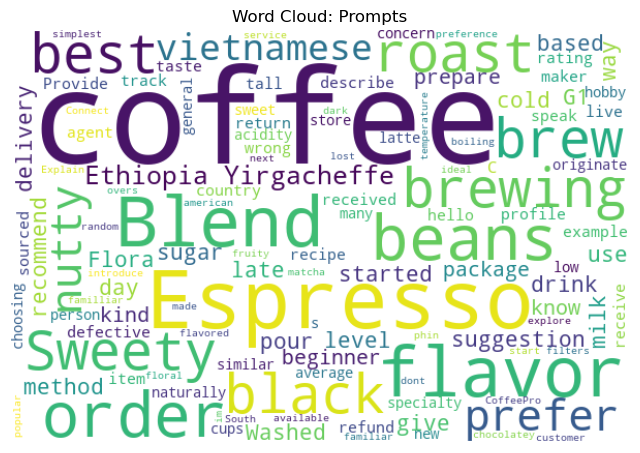

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- WORD CLOUD: PROMPTS ----
plt.figure(figsize=(8, 6))
prompt_text = " ".join(df["prompt"].dropna().astype(str))
wordcloud_prompt = WordCloud(width=600, height=400, background_color="white", colormap="viridis").generate(prompt_text)
plt.imshow(wordcloud_prompt, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Prompts")
plt.show()



- word cloud - 'responses'

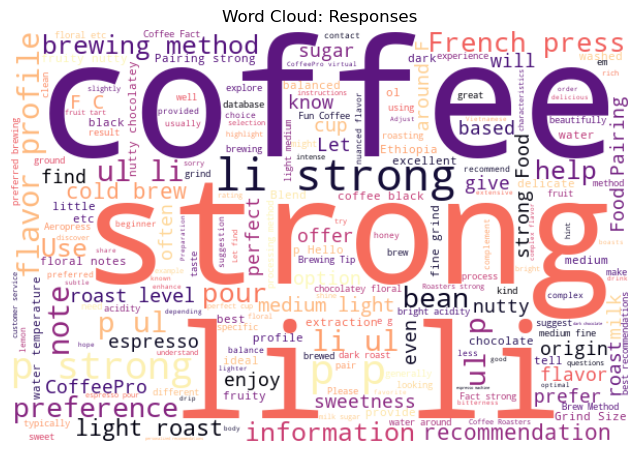

In [23]:

# ---- WORD CLOUD: RESPONSES ----
plt.figure(figsize=(8, 6))
response_text = " ".join(df["response"].dropna().astype(str))
wordcloud_response = WordCloud(width=600, height=400, background_color="white", colormap="magma").generate(response_text)
plt.imshow(wordcloud_response, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Responses")
plt.show()



 - feedback distribution

/var/folders/hj/877lyhb1715fltx1jm9dkwxw0000gn/T/ipykernel_98586/2772316600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="feedback_type", palette={"thumbs-up": "green", "thumbs-down": "red"})


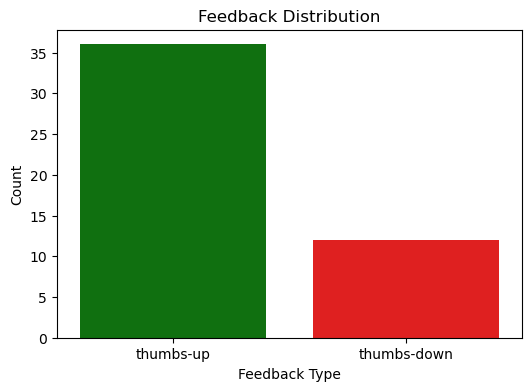

In [24]:

# ---- BAR GRAPH: 'thumbs-up' vs 'thumbs-down' ----
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="feedback_type", palette={"thumbs-up": "green", "thumbs-down": "red"})
plt.title("Feedback Distribution")
plt.xlabel("Feedback Type")
plt.ylabel("Count")
plt.show()

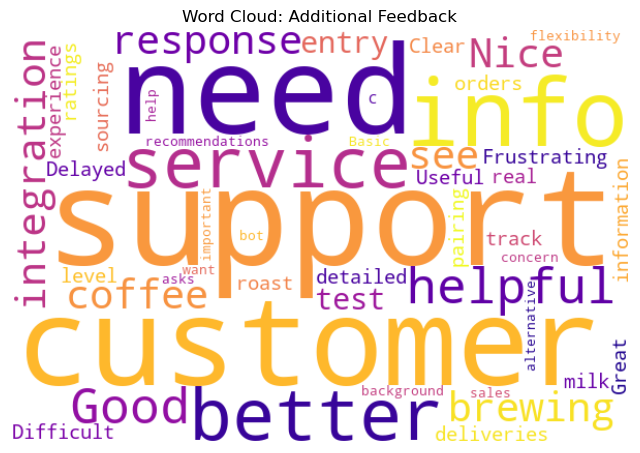

In [25]:
# ---- WORD CLOUD: ADDITIONAL FEEDBACK ----
plt.figure(figsize=(8, 6))
feedback_text = " ".join(df["additional_feedback"].dropna().astype(str))
wordcloud_feedback = WordCloud(width=600, height=400, background_color="white", colormap="plasma").generate(feedback_text)
plt.imshow(wordcloud_feedback, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Additional Feedback")
plt.show()

Looking at sentiment scores

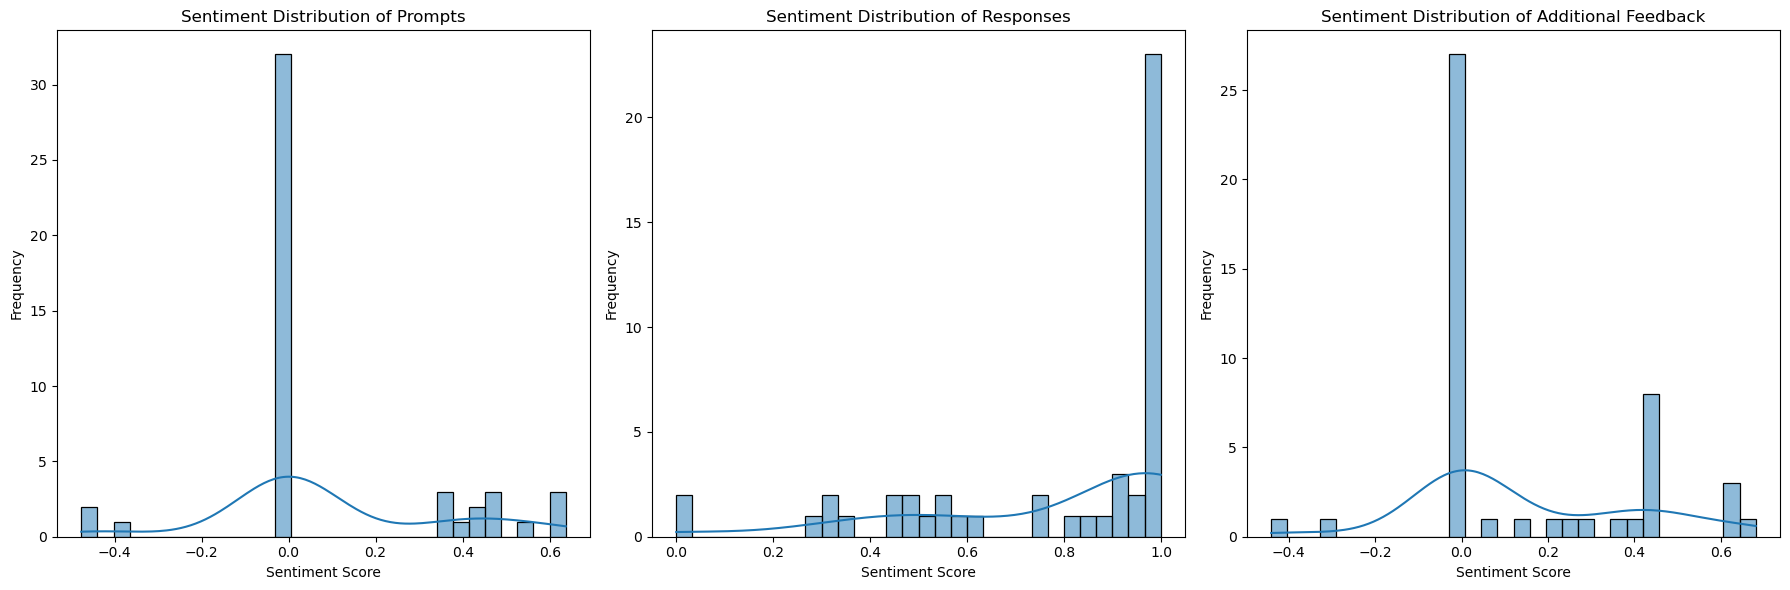

In [26]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download the VADER lexicon
nltk.download('vader_lexicon', quiet=True)

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment_score(text):
    if isinstance(text, str):  # Ensure input is a string
        return sid.polarity_scores(text)['compound']
    return 0  # Return neutral score for missing values

# Apply sentiment analysis to the selected columns
df['sentiment_prompt'] = df['prompt'].apply(get_sentiment_score)
df['sentiment_response'] = df['response'].apply(get_sentiment_score)
df['sentiment_feedback'] = df['additional_feedback'].apply(get_sentiment_score)

# Plot sentiment score distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
columns = ['sentiment_prompt', 'sentiment_response', 'sentiment_feedback']
titles = ['Sentiment Distribution of Prompts', 'Sentiment Distribution of Responses', 'Sentiment Distribution of Additional Feedback']

for ax, col, title in zip(axes, columns, titles):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Sentiment Score")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


- question widget
    - What are users looking for that the CoffeePro Virtual Agent currently does not provide?

In [ ]:
# check for toxicity 

#### (b) Refine model performance

- what can be done?

- procure more data

- cycle restarts

Congratulations! You’ve now completed the final Practice Learning Activity of this self-learning toolkit, applying the essential skills needed to monitor and improve your virtual agent through user feedback. By implementing structured evaluation systems, analyzing satisfaction ratings, and refining model performance, you’ve gained hands-on experience in ensuring AI systems remain accurate, ethical, and user-friendly over time.



#### [ Back to Learning Instructions 7](../learning-instructions-7.ipynb)